# MNIST sign language classification

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from keras.models import Sequential
from keras import layers
from keras import regularizers
from keras.utils import to_categorical

Using TensorFlow backend.


## Get the data

In [4]:
path = 'data/'

In [5]:
!ls {path}

amer_sign2.png	american_sign_language.PNG  sign_mnist_train.csv
amer_sign3.png	sign_mnist_test.csv


In [6]:
train_data = np.genfromtxt(f'{path}sign_mnist_train.csv',
                           delimiter=',',
                           skip_header=1,
                           dtype='float32')

test_data = np.genfromtxt(f'{path}sign_mnist_test.csv',
                          delimiter=',',
                          skip_header=1,
                          dtype='float32')

## Separate features and labels

In [25]:
# randomly shuffle the data
np.random.shuffle(train_data)

In [26]:
x_train, y_train = train_data[:,1:].copy(), \
                   train_data[:,0].copy()

x_test, y_test = test_data[:,1:].copy(), \
                 test_data[:,0].copy()

### plot a single image

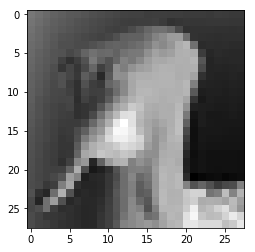

In [27]:
sign = x_train[5].copy()
sign = sign.reshape((28,28))
plt.imshow(sign, cmap=plt.cm.binary)

## Data preprocessing

### reshape image into 28 * 28 matrix and normalize the pixel values

In [28]:
x_train = x_train.reshape((len(x_train), 28, 28, 1)) 
x_train = x_train.astype('float32') / 255

x_test = x_test.reshape((len(x_test), 28, 28, 1))
x_test = x_test.astype('float32') / 255

In [29]:
x_train.shape, x_test.shape

((27455, 28, 28, 1), (7172, 28, 28, 1))

### one-hot encode the labels

In [30]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [31]:
y_train.shape, y_test.shape

((27455, 25), (7172, 25))

### create validation set

In [32]:
n_vals = int(0.2*x_train.shape[0])
n_vals

5491

In [33]:
x_val, y_val = x_train[:n_vals], y_train[:n_vals]
x_train, y_train = x_train[n_vals:], y_train[n_vals:]

## Create model

In [34]:
model = Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(y_train.shape[1], activation='softmax')
])

In [35]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [36]:
history = model.fit(x_train, y_train, 
                    batch_size=128, epochs=30,
                    validation_data=(x_val, y_val))

Train on 21964 samples, validate on 5491 samples
Epoch 1/30
21964/21964 [==============================] - 9s 400us/step - loss: 2.6831 - acc: 0.1868 - val_loss: 2.3355 - val_acc: 0.2453
Epoch 2/30
21964/21964 [==============================] - 9s 399us/step - loss: 1.6584 - acc: 0.4639 - val_loss: 1.3360 - val_acc: 0.5706
Epoch 3/30
21964/21964 [==============================] - 8s 380us/step - loss: 1.0844 - acc: 0.6449 - val_loss: 0.8092 - val_acc: 0.7581
Epoch 4/30
21964/21964 [==============================] - 8s 371us/step - loss: 0.6915 - acc: 0.7738 - val_loss: 0.5638 - val_acc: 0.8213
Epoch 5/30
21964/21964 [==============================] - 9s 388us/step - loss: 0.4446 - acc: 0.8562 - val_loss: 0.3890 - val_acc: 0.8794
Epoch 6/30
21964/21964 [==============================] - 8s 377us/step - loss: 0.2868 - acc: 0.9097 - val_loss: 0.3119 - val_acc: 0.9060
Epoch 7/30
21964/21964 [==============================] - 8s 374us/step - loss: 0.1745 - acc: 0.9476 - val_loss: 0.0855 - v

## Loss and accuracy curves

In [37]:
history_dict = history.history

training_loss = history_dict['loss']
training_acc = history_dict['acc']

val_loss = history_dict['val_loss']
val_acc = history_dict['val_acc']

epochs = range(1, len(val_acc) + 1)

### Training and validation loss

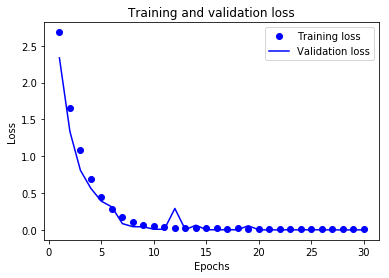

In [38]:
plt.plot(epochs, training_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Training and validation accuracy

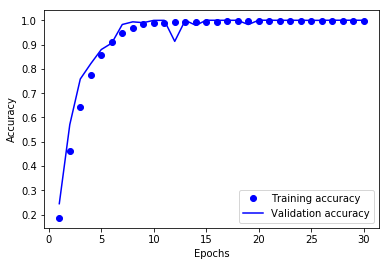

In [39]:
plt.plot(epochs, training_acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')

plt.legend('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Evaluate model on test set

In [40]:
test_loss, test_acc = model.evaluate(x_test, y_test)
test_acc

7172/7172 [==============================] - 1s 136us/step


0.9060234244283324

In [41]:
model.save('model1.h5')

## Apply regularization techniques

In [69]:
model = Sequential([
    layers.Conv2D(32, (3,3), activation='relu', 
                  input_shape=(28, 28, 1), 
                  kernel_regularizer=regularizers.l2(l=0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),
    layers.Conv2D(64, (3,3), activation='relu',
                  kernel_regularizer=regularizers.l2(l=0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),
    layers.Conv2D(64, (3,3), activation='relu',
                  kernel_regularizer=regularizers.l2(l=0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(y_train.shape[1], activation='softmax')
])

In [70]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [71]:
history = model.fit(x_train, y_train, 
                    batch_size=128, epochs=50,
                    validation_data=(x_val, y_val))

Train on 21964 samples, validate on 5491 samples
Epoch 1/50
21964/21964 [==============================] - 9s 431us/step - loss: 3.1126 - acc: 0.0868 - val_loss: 2.8000 - val_acc: 0.1745
Epoch 2/50
21964/21964 [==============================] - 9s 408us/step - loss: 2.3356 - acc: 0.2852 - val_loss: 1.8445 - val_acc: 0.4806
Epoch 3/50
21964/21964 [==============================] - 9s 404us/step - loss: 1.7069 - acc: 0.4789 - val_loss: 1.3175 - val_acc: 0.6305
Epoch 4/50
21964/21964 [==============================] - 9s 399us/step - loss: 1.3418 - acc: 0.5984 - val_loss: 1.0801 - val_acc: 0.7066
Epoch 5/50
21964/21964 [==============================] - 9s 418us/step - loss: 1.1042 - acc: 0.6810 - val_loss: 0.8221 - val_acc: 0.7873
Epoch 6/50
21964/21964 [==============================] - 9s 406us/step - loss: 0.9429 - acc: 0.7375 - val_loss: 0.6596 - val_acc: 0.8691
Epoch 7/50
21964/21964 [==============================] - 9s 404us/step - loss: 0.8141 - acc: 0.7867 - val_loss: 0.5153 - v

## Loss and accuracy curves

In [72]:
history_dict = history.history

training_loss = history_dict['loss']
training_acc = history_dict['acc']

val_loss = history_dict['val_loss']
val_acc = history_dict['val_acc']

epochs = range(1, len(val_acc) + 1)

### Training and validation loss

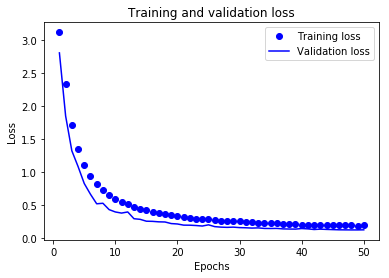

In [73]:
plt.plot(epochs, training_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Training and validation accuracy

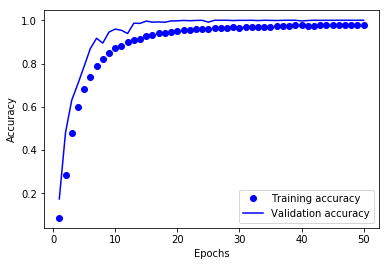

In [74]:
plt.plot(epochs, training_acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')

plt.legend('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Evaluate model on test set

In [75]:
test_loss, test_acc = model.evaluate(x_test, y_test)
test_acc

7172/7172 [==============================] - 1s 141us/step


0.9230340211935304

**Notes**

- changing optimizer to adam didn't help much
- dropout increased accuracy by over 3%